In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('/content/Student_Satisfaction_Survey.csv',encoding='latin1')

In [20]:
df

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
...,...,...,...,...,...,...,...,...,...,...,...,...
575,16,9,170,The institute/ teachers use student-centric me...,1,0,0,2,6,4.33 / 86.67,TYBSC,BACHELOR OF SCIENCE
576,17,9,170,Teachers encourage you to participate in extra...,0,0,0,3,6,4.67 / 93.33,TYBSC,BACHELOR OF SCIENCE
577,18,9,170,Efforts are made by the institute/ teachers to...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE
578,19,9,170,What percentage of teachers use ICT tools such...,0,0,1,3,5,4.44 / 88.89,TYBSC,BACHELOR OF SCIENCE


In [16]:
questions=df['Questions'].unique()
questions

array(['How much of the syllabus was covered in the class?',
       'How well did the teachers prepare for the classes?',
       'How well were the teachers able to communicate?',
       'The teacher\x92s approach to teaching can best be described as',
       'Fairness of the internal evaluation process by the teachers.',
       'Was your performance in assignments discussed with you?',
       'The institute takes an active interest in promoting internships, student exchange, field visit opportunities for students.',
       'The teaching and mentoring process in your institution facilitates you in cognitive, social and\nemotional growth.',
       'The institution provides multiple opportunities to learn and grow.',
       'Teachers inform you about your expected competencies, course outcomes and program\noutcomes.',
       'Your mentor does a necessary follow-up with an assigned task to you.',
       'The teachers illustrate the concepts through examples and applications.',
       'The

In [34]:
df.isnull().sum()

,0
SN,0
Total Feedback Given,0
Total Configured,0
Questions,0
Weightage 1,0
Weightage 2,0
Weightage 3,0
Weightage 4,0
Weightage 5,0
Average/ Percentage,0


In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df['Average_Numeric'] = df['Average/ Percentage'].str.extract(r'(^\d+(?:\.\d+)?)').astype(float)

Top 5 and Bottom 5 Courses by Average Rating


In [37]:
course_avg = df.groupby('Course Name')['Average_Numeric'].mean().sort_values()

print("📉 Bottom 5 Courses by Average Rating:")
print(course_avg.head(5))

print("\n📈 Top 5 Courses by Average Rating:")
print(course_avg.tail(5))


📉 Bottom 5 Courses by Average Rating:
Course Name
MSC DATA SCIENCE - 1    2.7340
SYBSC                   3.2215
SY COMPUTER SCIENCE     3.3545
MSC DATA SCIENCE - 3    3.3670
MSC MICROBIOLOGY - 1    3.3835
Name: Average_Numeric, dtype: float64

📈 Top 5 Courses by Average Rating:
Course Name
SYBMS                             4.357
MSC INFORMATION TECHNOLOGY - 1    4.500
TYBSC                             4.524
MSC ANALYTICAL CHEMISTRY SEM I    4.525
FYBA                              4.550
Name: Average_Numeric, dtype: float64


 Most and Least Satisfying Questions Overall



In [38]:
question_avg = df.groupby('Questions')['Average_Numeric'].mean().sort_values()

print("❌ Least Satisfying Questions:")
print(question_avg.head(3))

print("\n✅ Most Satisfying Questions:")
print(question_avg.tail(3))

❌ Least Satisfying Questions:
Questions
The teaching and mentoring process in your institution facilitates you in cognitive, social and\nemotional growth.    3.577931
What percentage of teachers use ICT tools such as LCD projectors, Multimedia, etc. while teaching?                    3.582759
The teachers identify your strengths and encourage you to provide the proper level of challenges.                     3.615172
Name: Average_Numeric, dtype: float64

✅ Most Satisfying Questions:
Questions
How well did the teachers prepare for the classes?              4.090000
How well were the teachers able to communicate?                 4.197241
Fairness of the internal evaluation process by the teachers.    4.215517
Name: Average_Numeric, dtype: float64


Participation Rate Analysis


In [39]:
df['Participation Rate'] = df['Total Feedback Given'] / df['Total Configured']

participation_stats = df.groupby('Course Name')['Participation Rate'].mean().sort_values()

print("🟢 Top 5 Participation Rates:")
print(participation_stats.tail(5))

print("\n🔴 Bottom 5 Participation Rates:")
print(participation_stats.head(5))


🟢 Top 5 Participation Rates:
Course Name
SY COMPUTER SCIENCE               0.562500
MSC MICROBIOLOGY - 3              0.583333
FY BCOM (BANKING & INSURANCE)     0.606061
FY BCOM (ACCOUNTING & FINANCE)    0.621849
MSC ORGANIC CHEMISTRY - 3         0.772727
Name: Participation Rate, dtype: float64

🔴 Bottom 5 Participation Rates:
Course Name
FYBA                              0.006944
TYBMS                             0.038095
SYBSC                             0.044025
MSC ANALYTICAL CHEMISTRY SEM I    0.047619
MSC INFORMATION TECHNOLOGY - 1    0.047619
Name: Participation Rate, dtype: float64


Department-wise (Basic Course) Performanc


In [40]:
dept_avg = df.groupby('Basic Course')['Average_Numeric'].mean().sort_values()

print("🏛️ Department-wise Average Scores:")
print(dept_avg)


🏛️ Department-wise Average Scores:
Basic Course
MSC DATA SCIENCE                                 3.050500
B.SC. COMPUTER SCIENCE                           3.354500
B.VOC FOOD TECHNOLOGY                            3.400000
MSC PHYSICS                                      3.425000
MSC MICROBIOLOGY                                 3.538000
MA PSYCHOLOGY                                    3.600500
BACHELOR OF COMMERCE                             3.719000
MSC COMPUTER SCIENCE                             3.845500
BACHELOR OF SCIENCE                              3.852667
MSC ORGANIC CHEMISTRY                            3.972500
MSC ANALYTICAL CHEMISTRY                         4.033750
BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)    4.075500
BACHELOR OF MANAGEMENT STUDIES                   4.092167
BACHELOR OF ARTS                                 4.335000
BACHELOR OF COMMERCE (BANKING AND INSURANCE)     4.350000
MSC INFORMATION TECHNOLOGY                       4.354500
Name: Average_Numeric, d

Heatmap of Weightage Distribution per Question

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipython-input-41-1958092823.py:11: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-41-1958092823.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


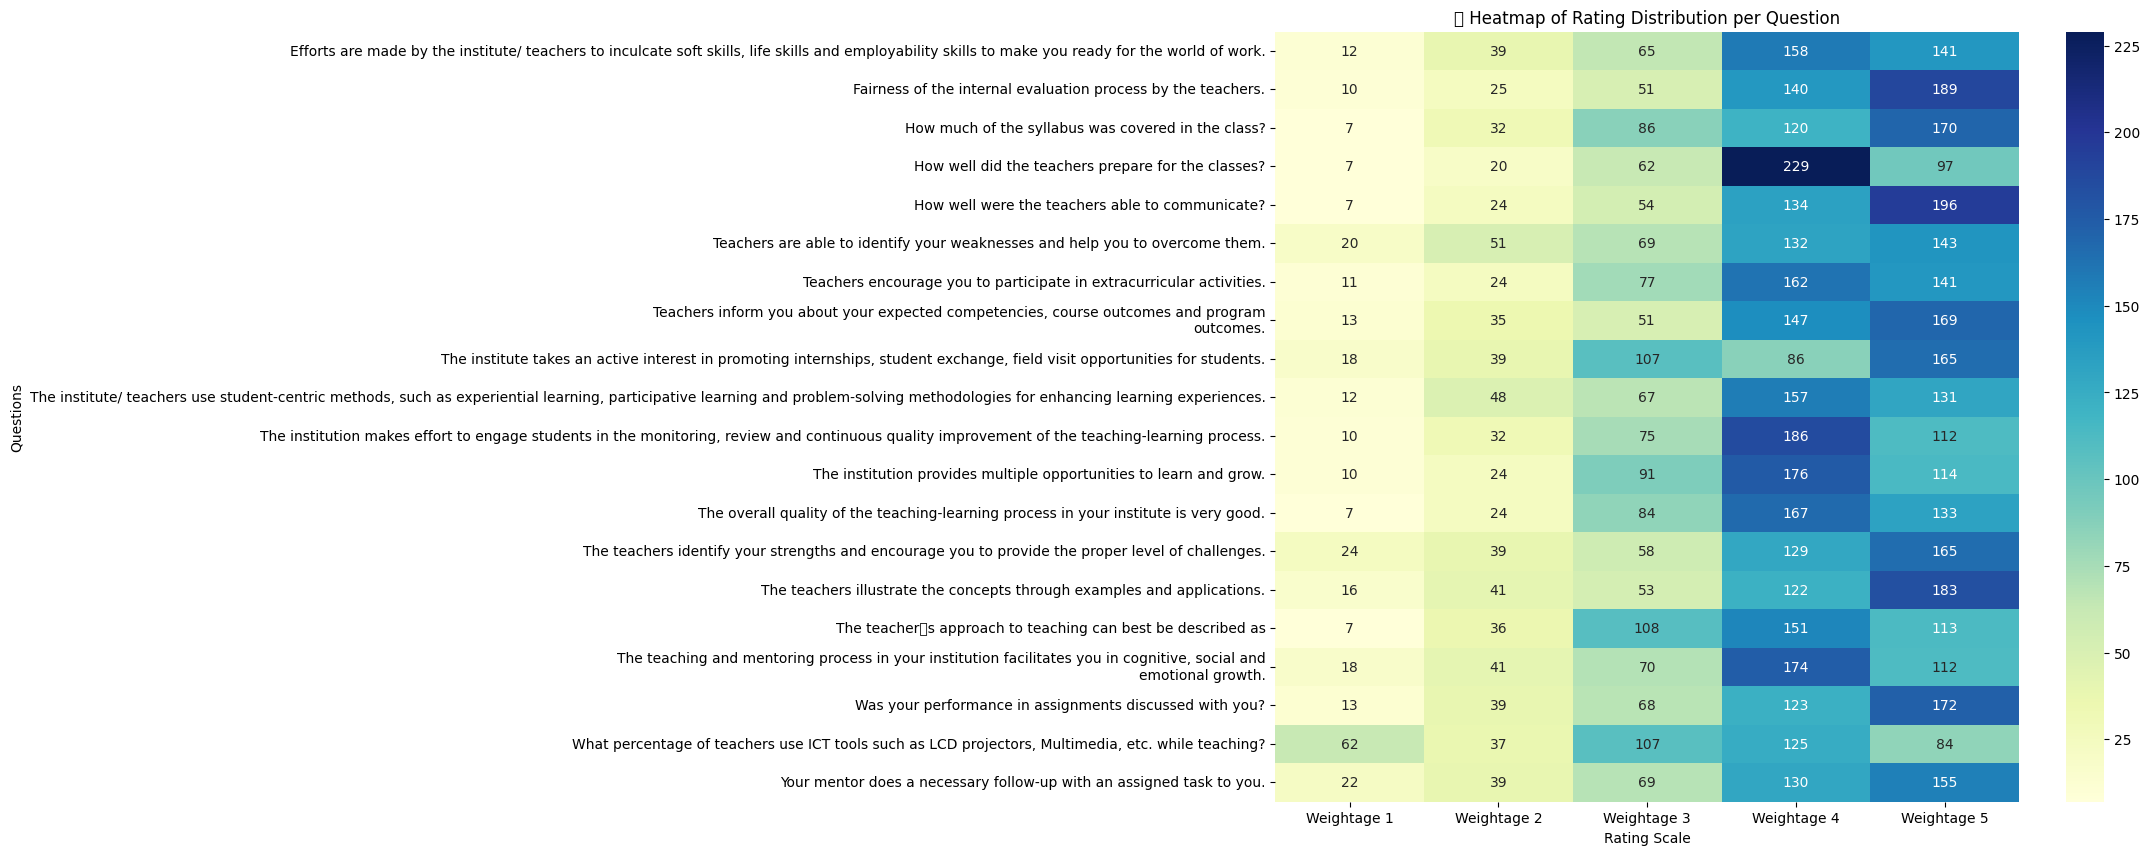

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.groupby('Questions')[['Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5']].sum()

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title("🔥 Heatmap of Rating Distribution per Question")
plt.xlabel("Rating Scale")
plt.ylabel("Questions")
plt.tight_layout()
plt.show()

 Validation of Given vs Calculated Average Scores

In [42]:
df['Calculated_Avg'] = (
    df['Weightage 1']*1 +
    df['Weightage 2']*2 +
    df['Weightage 3']*3 +
    df['Weightage 4']*4 +
    df['Weightage 5']*5
) / df['Total Feedback Given']

df['Difference'] = abs(df['Calculated_Avg'] - df['Average_Numeric'])

mismatches = df[df['Difference'] > 0.1]  # threshold can be adjusted
print("⚠️ Rows where average score might be miscalculated:")
print(mismatches[['Course Name', 'Questions', 'Average_Numeric', 'Calculated_Avg', 'Difference']])


⚠️ Rows where average score might be miscalculated:
Empty DataFrame
Columns: [Course Name, Questions, Average_Numeric, Calculated_Avg, Difference]
Index: []
